# Project From Coursera Google Data Analytic

## Divvy Bike Share
### Goals : Designing a marketing strategy at converting regular riders into annual members

## ASK Phase


### Business Objective:
Marketing director wants to increase revenue from casual users to subscriptions


### Business Task:
How do annual members and casual riders use Cyclistic bikes differently?

## Data Preparation
link data download: https://divvy-tripdata.s3.amazonaws.com/index.html

### Data Organization:
Data is stored in csv format files, in this analysis the period taken is one full year of data starting from October 2021 to September 2022. there 13 columns: ride_id, rideable_type, started_at	ended_at, start_station_name,start_station_id, end_station_name, end_station_id, start_lat, start_lng, nd_lat, end_lng, member_casual

### Problems with the dataset:
There are some discrepancies in the structure of the dataframe. The majority of the errors (duplicate records, missing fields, etc.) can be solved by data cleansing, but there are a few that require more explanation.

## Analyze summary

In [1]:
#Import Library for analysis
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "png"

In [2]:
df = pd.read_csv('D:\DataAnalyticsGoogle_Coursera\Project\Project_DivvyTripData\Python\clean_divvy-trip_102021-092022.csv')

##### Analysis total ride, average trip duration, and rideable type
Based on the rideable type provided by the divvy company, the non-subscriber and subscriber types are dominated by classic bicycles. In terms of time, it is very different from the average trip result, it turns out that the docked bike type has the longest usage

In [3]:
#how many customer segmented by usertype
df['usertype'].value_counts()

subscriber        2668022
non-subscriber    1805849
Name: usertype, dtype: int64

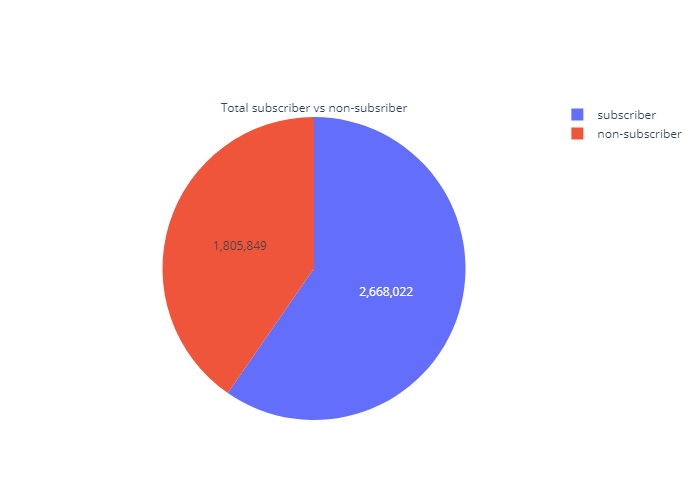

In [4]:
#Visualize using pie chart subscriber vs non-subscriber [iplot]
import plotly.graph_objs as go
from plotly.offline import iplot

labels = ['subscriber', 'non-subscriber']

pie_online_order = go.Pie(labels = labels, 
                          values = df['usertype'].value_counts(), 
                          hoverinfo = 'label+percent', 
                          textinfo = 'value', 
                          name= 'usertype', 
                          title ='Total subscriber vs non-subsriber')

iplot([pie_online_order])

##### Monthly analysis of the number of user types and average trip duration
The lowest number of riders January - February is very reasonable when viewed from the weather that occurs. but when viewed from the average trip duration, it is quite stable.

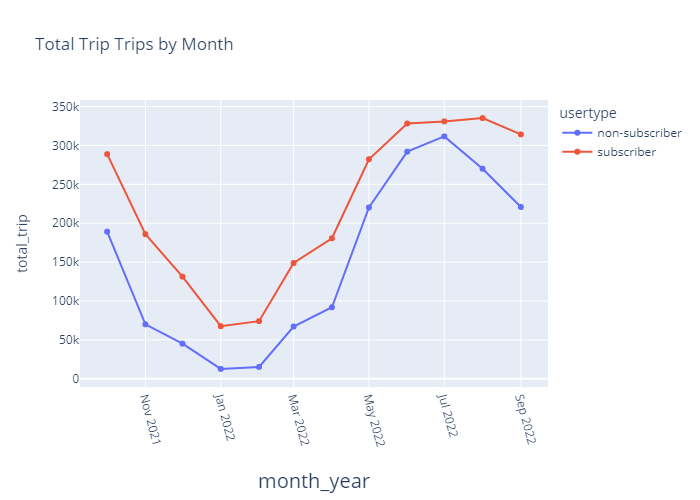

In [5]:
# Total Trips by Month
dfg = pd.DataFrame(df.groupby(['usertype','month_year'])['ride_id'].count().reset_index())
dfg.columns=['usertype','month_year', 'total_trip']
dfg
fig = px.line(dfg, 
              x="month_year", 
              y="total_trip", 
              color='usertype',
              markers=True,
              title= 'Total Trip Trips by Month')
fig.update_xaxes(
        tickangle = 75,
        title_text = "month_year",
        title_font = {"size": 20},
        title_standoff = 25)
fig.show()

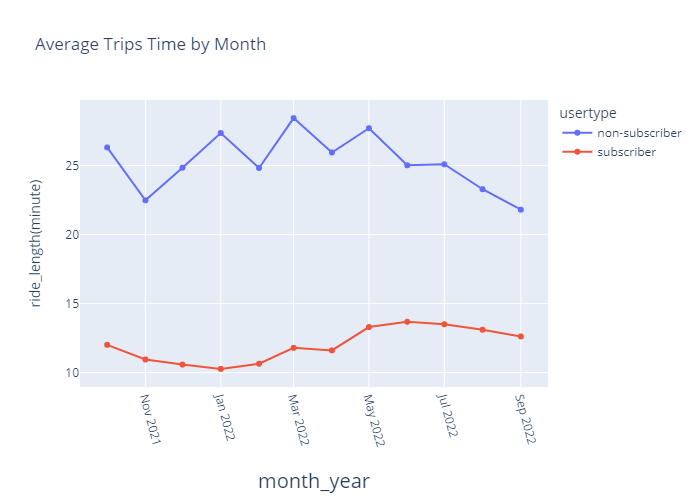

In [6]:
# Average trip by month
dfg = pd.DataFrame(df.groupby(['usertype','month_year'])['ride_length(minute)'].mean().reset_index())
dfg.columns=['usertype','month_year', 'ride_length(minute)']
fig = px.line(dfg, 
              x="month_year", 
              y="ride_length(minute)", 
              color='usertype',
              markers=True,
              title= 'Average Trips Time by Month')
fig.update_xaxes(
        tickangle = 75,
        title_text = "month_year",
        title_font = {"size": 20},
        title_standoff = 25)
fig.show()


In [7]:
# count rider by usertype and rideable_type
df.groupby(['usertype','rideable_type'])['ride_id'].count()

usertype        rideable_type
non-subscriber  classic_bike      938298
                docked_bike       189917
                electric_bike     677634
subscriber      classic_bike     1797063
                electric_bike     870959
Name: ride_id, dtype: int64

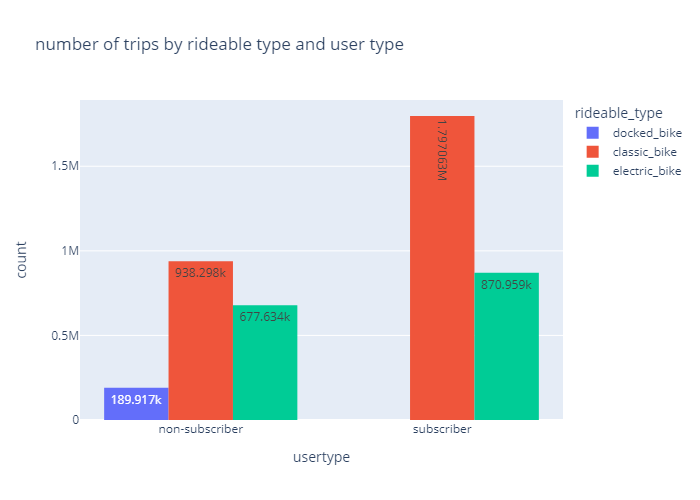

In [8]:
# visualize count trips of rideable type by type of user
df_viz = df[['usertype','ride_id','rideable_type']]
fig = px.histogram(df_viz, 
                   x="usertype", 
                   color='rideable_type',
                   histfunc='count', 
                   barmode='group',
                   text_auto=True,
                   title= 'number of trips by rideable type and user type'
                   )
fig.show()

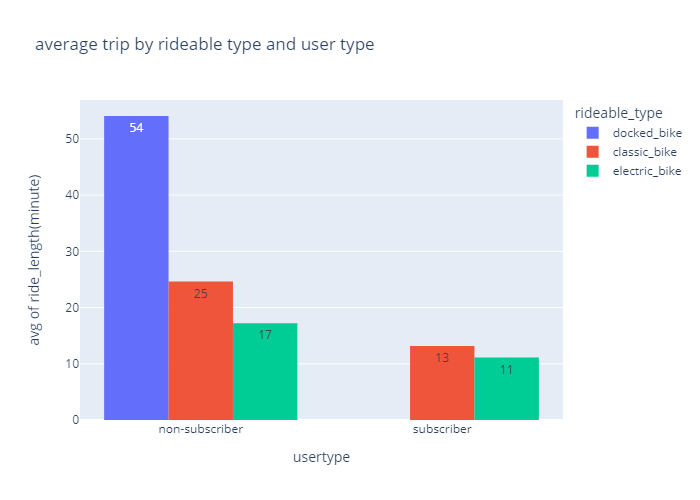

In [9]:
# visualize average trips of rideable type by type of user
df_viz = df[['usertype','ride_length(minute)','rideable_type']]
fig = px.histogram(df_viz, 
                   x="usertype", 
                   y="ride_length(minute)",
                   color='rideable_type',
                   histfunc='avg', 
                   barmode='group',
                   text_auto='.2s',
                   title= 'average trip by rideable type and user type'
                   )
fig.show()

##### Hourly analysis of the number of user types and average trip duration
The peak occurrence of rental hours is at 5 pm, followed by 4 and 6 pm both from subscription and non-subscribed users. if you look at the average length of rental time (trip duration) it occurs in the range from 10 am to 3 pm

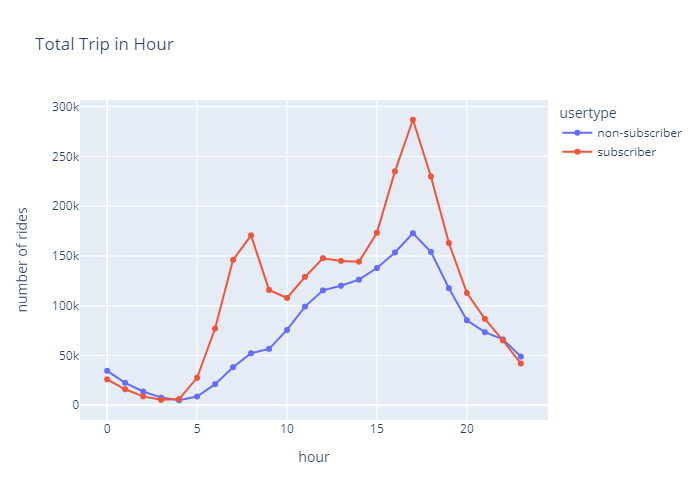

In [10]:
# most busy day in hours
dfg = pd.DataFrame(df.groupby(['usertype','started_rent(hour)'])['ride_id'].count().reset_index())
dfg.columns=['usertype','started_rent(hour)', 'total_trip']
dfg
fig = px.line(dfg, 
              x="started_rent(hour)", 
              y="total_trip", 
              color='usertype',
              markers=True,
              title= 'Total Trip in Hour')
fig.update_layout(
    xaxis_title="hour",
    yaxis_title="number of rides",
    hovermode="x"
)
fig.show()

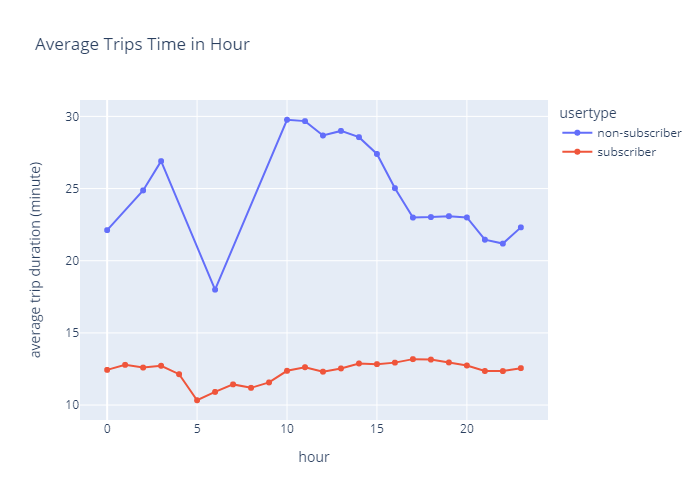

In [11]:
# average duration trip in hours
dfg = pd.DataFrame(df.groupby(['usertype','started_rent(hour)'])['ride_length(minute)'].mean().reset_index())
dfg.columns=['usertype','started_rent(hour)', 'ride_length(minute)']
fig = px.line(dfg.loc[(df.usertype)=='non-subscriber'], 
              x="started_rent(hour)", 
              y="ride_length(minute)", 
              color='usertype',
              markers=True,
              title= 'Average Trips Time in Hour')
fig.update_layout(
    xaxis_title="hour",
    yaxis_title="average trip duration (minute)",
    hovermode="x"
)
fig.show()

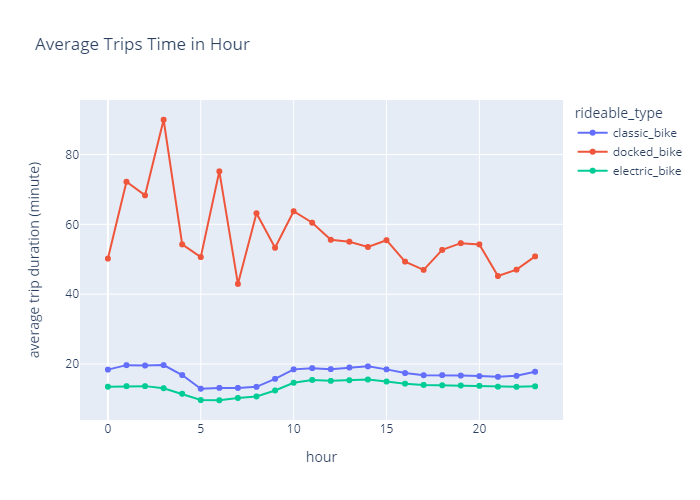

In [12]:
# average duration trip rideable_type in hours
dfg = pd.DataFrame(df.groupby(['rideable_type','started_rent(hour)'])['ride_length(minute)'].mean().reset_index())
dfg.columns=['rideable_type','started_rent(hour)', 'ride_length(minute)']
fig = px.line(dfg, 
              x="started_rent(hour)", 
              y="ride_length(minute)", 
              color='rideable_type',
              markers=True,
              title= 'Average Trips Time in Hour')
fig.update_layout(
    xaxis_title="hour",
    yaxis_title="average trip duration (minute)",
    hovermode="x"
)
fig.show()

##### Weekly analysis of the number of user types and average trip duration
Subscription and non-subscribed users have the same highest number of tenants on Fridays as well as the average trip duration continued on Mondays and Saturdays.

In [13]:
# average trip time by usertype and dayofweek
df.groupby(['usertype','dayofweek'])['ride_id'].count()

usertype        dayofweek
non-subscriber  Friday       259615
                Monday       210025
                Saturday     388152
                Sunday       313906
                Thursday     224952
                Tuesday      202888
                Wednesday    206311
subscriber      Friday       377415
                Monday       373277
                Saturday     350969
                Sunday       302515
                Thursday     412206
                Tuesday      428421
                Wednesday    423219
Name: ride_id, dtype: int64

In [14]:
# average trip time by usertype and dayofweek
df.groupby(['usertype','dayofweek'])['ride_length(minute)'].mean()

usertype        dayofweek
non-subscriber  Friday       23.161343
                Monday       25.744616
                Saturday     27.646577
                Sunday       28.521395
                Thursday     22.067576
                Tuesday      22.230743
                Wednesday    21.525207
subscriber      Friday       12.208629
                Monday       12.059541
                Saturday     14.051331
                Sunday       13.944783
                Thursday     12.024019
                Tuesday      11.818905
                Wednesday    11.878179
Name: ride_length(minute), dtype: float64

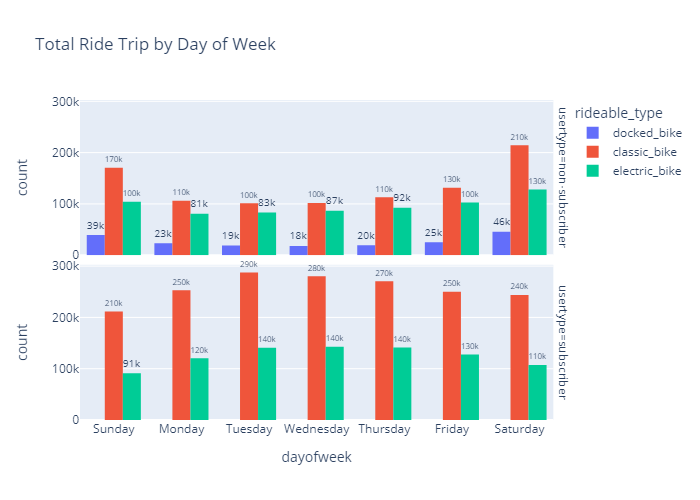

In [15]:
# visualize average trips of rideable type by type of user
df_viz = df[['usertype','ride_length(minute)','rideable_type','dayofweek']].reset_index()
fig = px.histogram(df_viz, 
                   x="dayofweek", 
                   color='rideable_type',
                   barmode='group',
                   text_auto='.2s',
                   title= 'Total Ride Trip by Day of Week',
                   facet_row='usertype'
                   )
fig.update_traces(textfont_size=12, 
                  textangle=0, 
                  textposition="outside",
                #   mode="markers+lines", 
                  hovertemplate=None,
                  cliponaxis=False)
fig.update_xaxes(categoryorder='array', 
                 categoryarray= ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
fig.show()

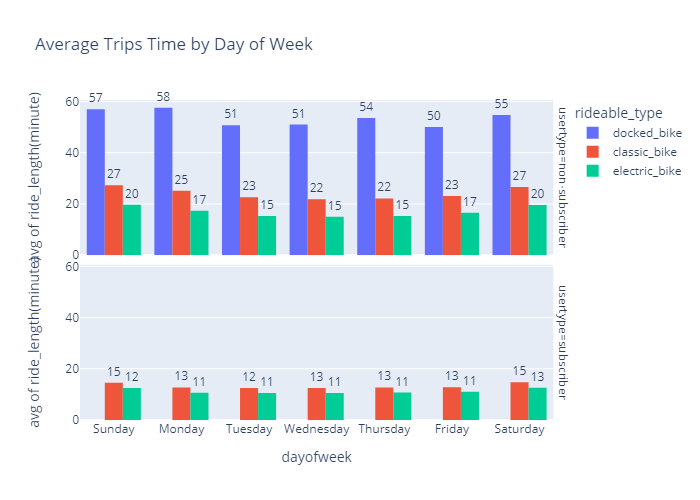

In [16]:
# visualize increase in new users every month
fig = px.histogram(df_viz, 
                   x="dayofweek",
                   y = 'ride_length(minute)',
                   color='rideable_type',
                   barmode='group',
                   histfunc = 'avg',
                   text_auto='.2s',
                   title= 'Average Trips Time by Day of Week',
                   facet_row='usertype'
                   )
fig.update_traces(textfont_size=12, 
                  textangle=0, 
                  textposition="outside",
                #   mode="markers+lines", 
                  hovertemplate=None,
                  cliponaxis=False)
fig.update_xaxes(categoryorder='array', 
                 categoryarray= ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
fig.show()

##### Analyze station with the highest number of visitors
Streeter Dr & Grand Ave is a busy station from the start of the rental to the bike return station. DuSable Lake Shore Dr & Monroe St and DuSable Lake Shore Dr & North Blvd are minute and third in busy stations. from these three stations can be used for campaigns to expand the number of membership. but if we look at the average rental duration, we agree that the docked type is the longest rental bike. Locations where docked bicycles are widely used from Dusable Harbor station to Wells St & Elm St at 18.00 for 678.4 hours in the past year

In [24]:
# Top 10 average duration by type of bike from-to station
dfg = pd.DataFrame(df.groupby(['rideable_type','usertype','start_station_name','end_station_name', 'started_rent(hour)'])['ride_length(minute)'].mean().nlargest(10).sort_values(ascending=False).reset_index())
dfg.columns=['rideable_type','usertype','start_station_name','end_station_name', 'started_rent(hour)', 'average_duration_trip']
dfg

,rideable_type,usertype,start_station_name,end_station_name,started_rent(hour),average_duration_trip
0,docked_bike,non-subscriber,Dusable Harbor,Wells St & Elm St,18,40705.016667
1,docked_bike,non-subscriber,Sheffield Ave & Fullerton Ave,Base - 2132 W Hubbard Warehouse,19,34354.066667
2,docked_bike,non-subscriber,DuSable Lake Shore Dr & Monroe St,Green St & Randolph St*,18,32035.450000
3,docked_bike,non-subscriber,Central Ave & Lake St,California Ave & Milwaukee Ave,8,30400.550000
4,docked_bike,non-subscriber,Millennium Park,Fairfield Ave & Roosevelt Rd,1,29271.100000
5,docked_bike,non-subscriber,Wabash Ave & Grand Ave,Base - 2132 W Hubbard Warehouse,19,27082.800000
6,docked_bike,non-subscriber,Halsted St & 18th St (Temp),Base - 2132 W Hubbard Warehouse,11,26539.400000
7,docked_bike,non-subscriber,Rush St & Superior St,Base - 2132 W Hubbard Warehouse,20,22629.900000
8,docked_bike,non-subscriber,Shedd Aquarium,Base - 2132 W Hubbard Warehouse,15,22618.366667
9,docked_bike,non-subscriber,Damen Ave & Chicago Ave,Base - 2132 W Hubbard Warehouse,15,20144.116667


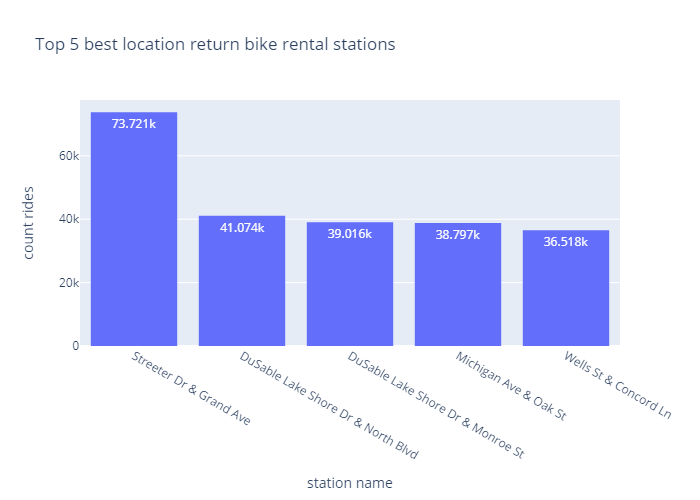

In [19]:
# visualize Top 5 best location return bike rental stations 
df_viz = pd.DataFrame(df[['end_station_name']].value_counts().nlargest(5).reset_index())
df_viz.columns=['name','count']

fig = px.histogram(df_viz, 
                   x='name',
                   y='count', 
                   barmode='group',
                   text_auto=True,
                   title= 'Top 5 best location return bike rental stations'
                   )
fig.update_yaxes(
        title_text = "count rides")
fig.update_xaxes(
        title_text = "station name")
fig.show()

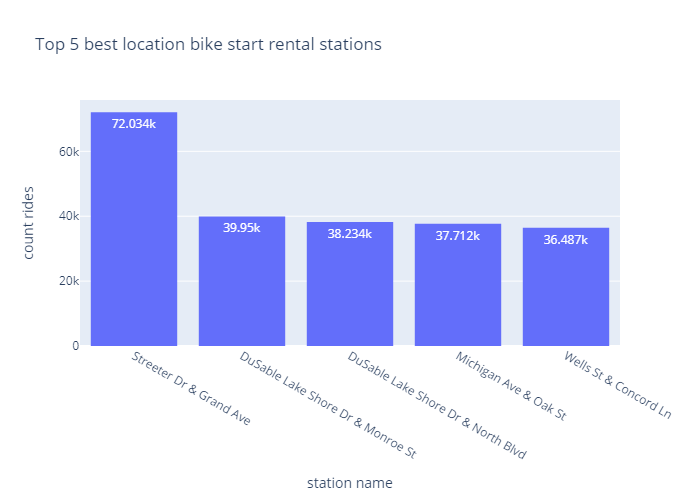

In [20]:
# visualize Top 5 best location bike rental stations
dfg = pd.DataFrame(df[['start_station_name']].value_counts().nlargest(5).reset_index())
dfg.columns=['name','count']

fig = px.histogram(dfg, 
                   x='name',
                   y='count', 
                   barmode='group',
                   text_auto=True,
                   title= 'Top 5 best location bike start rental stations'
                   )
fig.update_yaxes(
        title_text = "count rides")
fig.update_xaxes(
        title_text = "station name")
fig.show()